<a href="https://colab.research.google.com/github/sahug/ds-nlp/blob/main/NLP%20-%20Session%2019%20-%20Word2Vec%20IMDB%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Session 19 - Word2Vec IMDB Sentiment Analysis**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
labeled_df = pd.read_csv("/content/labeledTrainData.tsv", sep="\t")
# test_df = pd.read_csv("/content/testData.tsv", sep="\t")
# unlabeled_df = pd.read_csv("/content/unlabeledTrainData.tsv", sep="\t", on_bad_lines='skip')

In [ ]:
labeled_df.columns

In [4]:
labeled_df.describe

<bound method NDFrame.describe of             id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...

[25000 rows x 3 columns]>

In [5]:
labeled_df.sentiment.isnull().sum(), labeled_df.review.isnull().sum()

(0, 0)

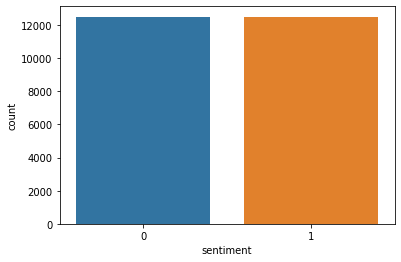

In [6]:
sns.countplot(x=labeled_df["sentiment"], data=labeled_df)

**Data Preprocessing**

In [7]:
!pip install gensim

In [8]:
!pip  install contractions

     |████████████████████████████████| 284 kB 6.7 MB/s 
     |████████████████████████████████| 106 kB 58.1 MB/s 


In [9]:
#Expanding Contraction - Contractions are shortened versions of words or syllables. They are created by removing specific, one or more letters from words.
import contractions
labeled_df["text"] = [contractions.fix(line) for line in labeled_df["review"]]
labeled_df["text"]

0        With all this stuff going down at the moment w...
1        \The Classic War of the Worlds\" by Timothy Hi...
2        The film starts with a manager (Nicholas Bell)...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I do not believe they made this film. Complete...
24997    Guy is a loser. Cannot get girls, needs to bui...
24998    This 30 minute documentary Buñuel made in the ...
24999    I saw this movie as a child and it broke my he...
Name: text, Length: 25000, dtype: object

In [10]:
#Remove Special Characters
import re

def remove_special_characters(text):
  pat = "[^a-zA-Z0-9.,!?/:;\"\'\s]"
  return re.sub(pat, "", text)

labeled_df["text"] = [remove_special_characters(line) for line in labeled_df["text"]] 
labeled_df["text"]

0        With all this stuff going down at the moment w...
1        The Classic War of the Worlds" by Timothy Hine...
2        The film starts with a manager Nicholas Bell g...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I do not believe they made this film. Complete...
24997    Guy is a loser. Cannot get girls, needs to bui...
24998    This 30 minute documentary Buuel made in the e...
24999    I saw this movie as a child and it broke my he...
Name: text, Length: 25000, dtype: object

In [11]:
# Remove Numbers
import re

# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

labeled_df["text"] = [remove_numbers(line) for line in labeled_df["text"]] 
labeled_df["text"]

0        With all this stuff going down at the moment w...
1        The Classic War of the Worlds" by Timothy Hine...
2        The film starts with a manager Nicholas Bell g...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious '...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I do not believe they made this film. Complete...
24997    Guy is a loser. Cannot get girls, needs to bui...
24998    This  minute documentary Buuel made in the ear...
24999    I saw this movie as a child and it broke my he...
Name: text, Length: 25000, dtype: object

In [12]:
#Remove Punctuation
import string

def remove_punctuation(text):
  text = "".join([c for c in text if c not in string.punctuation])
  return text

labeled_df["text"] = [remove_punctuation(line) for line in labeled_df["text"]] 
labeled_df["text"]

0        With all this stuff going down at the moment w...
1        The Classic War of the Worlds by Timothy Hines...
2        The film starts with a manager Nicholas Bell g...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious s...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I do not believe they made this film Completel...
24997    Guy is a loser Cannot get girls needs to build...
24998    This  minute documentary Buuel made in the ear...
24999    I saw this movie as a child and it broke my he...
Name: text, Length: 25000, dtype: object

In [13]:
#Remove Whitespace and Tabs
import re

def remove_extra_whitespace_tabs(text):
  pattern = "^\s*|\s\s*"
  return re.sub(pattern, " ", text).strip()

labeled_df["text"] = [remove_extra_whitespace_tabs(line) for line in labeled_df["text"]] 
labeled_df["text"]

0        With all this stuff going down at the moment w...
1        The Classic War of the Worlds by Timothy Hines...
2        The film starts with a manager Nicholas Bell g...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious s...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I do not believe they made this film Completel...
24997    Guy is a loser Cannot get girls needs to build...
24998    This minute documentary Buuel made in the earl...
24999    I saw this movie as a child and it broke my he...
Name: text, Length: 25000, dtype: object

In [14]:
#Tokenization
from gensim.utils import simple_preprocess
labeled_df["text"] = [simple_preprocess(line, deacc=True) for line in labeled_df["text"]]
labeled_df["text"]

0        [with, all, this, stuff, going, down, at, the,...
1        [the, classic, war, of, the, worlds, by, timot...
2        [the, film, starts, with, manager, nicholas, b...
3        [it, must, be, assumed, that, those, who, prai...
4        [superbly, trashy, and, wondrously, unpretenti...
                               ...                        
24995    [it, seems, like, more, consideration, has, go...
24996    [do, not, believe, they, made, this, film, com...
24997    [guy, is, loser, cannot, get, girls, needs, to...
24998    [this, minute, documentary, buuel, made, in, t...
24999    [saw, this, movie, as, child, and, it, broke, ...
Name: text, Length: 25000, dtype: object

In [19]:
#Remove Stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

labeled_df["text"] = [[word for word in tokens if word not in stop_words] for tokens in labeled_df["text"]]
labeled_df["text"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        [stuff, going, moment, mj, started, listening,...
1        [classic, war, worlds, timothy, hines, enterta...
2        [film, starts, manager, nicholas, bell, giving...
3        [must, assumed, praised, film, greatest, filme...
4        [superbly, trashy, wondrously, unpretentious, ...
                               ...                        
24995    [seems, like, consideration, gone, imdb, revie...
24996    [believe, made, film, completely, unnecessary,...
24997    [guy, loser, cannot, get, girls, needs, build,...
24998    [minute, documentary, buuel, made, early, one,...
24999    [saw, movie, child, broke, heart, story, unfin...
Name: text, Length: 25000, dtype: object

In [20]:
#Stemming
# import nltk
# porter_stemmer = nltk.porter.PorterStemmer()
# labeled_df["text"] = [[porter_stemmer.stem(word) for word in tokens] for tokens in labeled_df["text"]]
# labeled_df["text"]

In [21]:
#Lemmantization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
labeled_df["text"] = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in labeled_df["text"]]
labeled_df["text"]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0        [stuff, going, moment, mj, started, listening,...
1        [classic, war, world, timothy, hines, entertai...
2        [film, start, manager, nicholas, bell, giving,...
3        [must, assumed, praised, film, greatest, filme...
4        [superbly, trashy, wondrously, unpretentious, ...
                               ...                        
24995    [seems, like, consideration, gone, imdb, revie...
24996    [believe, made, film, completely, unnecessary,...
24997    [guy, loser, cannot, get, girl, need, build, p...
24998    [minute, documentary, buuel, made, early, one,...
24999    [saw, movie, child, broke, heart, story, unfin...
Name: text, Length: 25000, dtype: object

In [22]:
labeled_df.head()

,id,sentiment,review,text
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[classic, war, world, timothy, hines, entertai..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


In [23]:
train_target = labeled_df["sentiment"]
train_target

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64

In [24]:
train_feature = labeled_df.drop(["id", "review", "sentiment"], axis=1)
train_feature

,text
0,"[stuff, going, moment, mj, started, listening,..."
1,"[classic, war, world, timothy, hines, entertai..."
2,"[film, start, manager, nicholas, bell, giving,..."
3,"[must, assumed, praised, film, greatest, filme..."
4,"[superbly, trashy, wondrously, unpretentious, ..."
...,...
24995,"[seems, like, consideration, gone, imdb, revie..."
24996,"[believe, made, film, completely, unnecessary,..."
24997,"[guy, loser, cannot, get, girl, need, build, p..."
24998,"[minute, documentary, buuel, made, early, one,..."


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_feature, train_target, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20000, 1), (20000,), (5000, 1), (5000,))

In [26]:
X_train

,text
23311,"[movie, plain, dumbbr, br, casting, ralph, mee..."
23623,"[dahmer, young, confused, man, dahmer, confusi..."
1020,"[may, saint, preserve, u, movie, going, helpbr..."
12645,"[combination, reading, novella, viewing, film,..."
1533,"[daniel, day, lewis, left, foot, give, u, one,..."
...,...
21575,"[distasteful, cliched, thriller, young, couple..."
5390,"[stewart, wyoming, cattleman, dream, make, eno..."
860,"[many, way, lost, year, motion, picture, fines..."
15795,"[felt, film, throughout, waas, impressed, russ..."


In [27]:
from gensim.models import Word2Vec
import time

size = 1000
window = 3
min_count = 1
workers = 3
sg = 1 #skip-gram model (sg = 1)

word2vec_model_file = "/content/word2vec" + str(size) + ".model"
start_time = time.time()

w2v_model = Word2Vec(X_train["text"], min_count = min_count, size=size, workers=workers, window=window, sg=sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
w2v_model.save(word2vec_model_file)

Time taken to train word2vec model: 199.5869324207306


In [28]:
import numpy as np

sg_w2v_model = Word2Vec.load(word2vec_model_file)

# Store the vectors for train data in following file
word2vec_filename = "/content/train_review_word2vec.csv"

with open(word2vec_filename, "w+") as word2vec_file:
  
  for index, row in X_train.iterrows():
    
    model_vector = (np.mean([sg_w2v_model[token] for token in row], axis=0)).tolist()

    if index == 0:
      header = ",".join(str(ele) for ele in range(1000))
      word2vec_file.write(header)
      word2vec_file.write("\n")
    
    # Check if the line exists else it is vector of zeros

    if type(model_vector) is list:
      line = ",".join([str(vector_element) for vector_element in model_vector])
    else:
      line = ",".join([str(0) for i in range(1000)])
    word2vec_file.write(line)
    word2vec_file.write("\n")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [ ]:
import time

#Import the DecisionTreeeClassifier
from sklearn.tree import DecisionTreeClassifier

#Load from the filename
word2vec_df = pd.read_csv(word2vec_filename, on_bad_lines='skip')

#Initialize the model
clf_decision_word2vec = DecisionTreeClassifier()

start_time = time.time()

#Fit the model
clf_decision_word2vec.fit(word2vec_df, y_train)

print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

In [ ]:
from sklearn.metrics import classification_report
test_feartures_word2vec = []

for index, row in X_test.iterrows():
  model_vector = (np.mean([sg_w2v_model[token] for token in row], axis=0))
  if type(model_vector) is list:
    test_features_word2vec.append(model_vector)
  else:
    test_features_word2vec.append(np.array([0 for i in range(1000)]))

test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
print(classification_report(y_test["text"], test_predictions_word2vec))